In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from moexalgo import Ticker
import matplotlib.pyplot as plt
# Создаем объект Ticker для получения данных
yndx = Ticker('SBER')

# Загружаем данные с учетом ваших параметров
df = yndx.candles(date='2020-01-01', till_date='2023-10-18', period='1m')
df

,open,close,high,low,value,volume,begin,end
0,2712.8,2712.8,2712.8,2712.8,27128.0,10.0,2020-01-03 09:59:00,2020-01-03 09:59:59
1,2712.2,2701.0,2717.6,2697.4,7890645.4,2919.0,2020-01-03 10:00:00,2020-01-03 10:00:59
2,2708.8,2711.4,2712.0,2706.4,4539000.6,1676.0,2020-01-03 10:01:00,2020-01-03 10:01:59
3,2707.4,2715.4,2718.0,2706.4,5347815.4,1972.0,2020-01-03 10:02:00,2020-01-03 10:02:59
4,2714.6,2715.0,2717.0,2710.2,3101058.4,1143.0,2020-01-03 10:03:00,2020-01-03 10:03:59
...,...,...,...,...,...,...,...,...
9995,2894.2,2891.2,2895.0,2891.0,864558.2,299.0,2020-01-31 10:55:00,2020-01-31 10:55:59
9996,2891.4,2892.2,2892.4,2891.0,1440113.2,498.0,2020-01-31 10:56:00,2020-01-31 10:56:59
9997,2891.4,2894.4,2894.4,2891.4,147568.0,51.0,2020-01-31 10:57:00,2020-01-31 10:57:59
9998,2894.0,2895.0,2896.8,2893.0,1459270.4,504.0,2020-01-31 10:58:00,2020-01-31 10:58:59


In [3]:
df.close.describe()

count    10000.00000
mean      2756.42170
std         59.88872
min       2637.60000
25%       2710.00000
50%       2762.00000
75%       2792.65000
max       2910.00000
Name: close, dtype: float64

In [4]:
sber = Ticker('SBER')

# Загружаем данные с учетом ваших параметров
df_sber = sber.candles(date='2020-01-01', till_date='2023-10-18', period='1m')
df_sber

,open,close,high,low,value,volume,begin,end
0,255.99,255.99,255.99,255.99,7085803.2,27680.0,2020-01-03 09:59:00,2020-01-03 09:59:59
1,255.97,256.25,256.48,255.85,125850445.1,491340.0,2020-01-03 10:00:00,2020-01-03 10:00:59
2,256.28,256.68,256.73,256.17,51760336.6,201870.0,2020-01-03 10:01:00,2020-01-03 10:01:59
3,256.68,256.77,256.97,256.61,56437567.9,219760.0,2020-01-03 10:02:00,2020-01-03 10:02:59
4,256.80,256.79,256.80,256.60,29724410.4,115800.0,2020-01-03 10:03:00,2020-01-03 10:03:59
...,...,...,...,...,...,...,...,...
9995,258.50,258.92,259.00,258.50,109286027.3,422340.0,2020-01-31 10:00:00,2020-01-31 10:00:59
9996,258.97,258.98,259.00,258.74,74433000.0,287460.0,2020-01-31 10:01:00,2020-01-31 10:01:59
9997,258.92,258.80,258.92,258.77,32051784.3,123840.0,2020-01-31 10:02:00,2020-01-31 10:02:59
9998,258.80,258.45,258.80,258.35,73182300.9,283060.0,2020-01-31 10:03:00,2020-01-31 10:03:59


In [5]:
df_sber.describe()

,open,close,high,low,value,volume
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,259.904961,259.905714,259.988980,259.815047,1.821254e+07,7.005410e+04
std,4.113732,4.113651,4.115158,4.111449,3.185708e+07,1.226942e+05
min,251.400000,251.400000,251.450000,251.400000,2.590500e+03,1.000000e+01
25%,257.100000,257.100000,257.190000,257.000000,4.254316e+06,1.639750e+04
50%,258.850000,258.850000,258.900000,258.750000,9.362902e+06,3.607000e+04
75%,263.730000,263.730000,263.837500,263.565000,2.066729e+07,7.963000e+04
max,270.700000,270.730000,270.800000,270.550000,8.088964e+08,3.155930e+06


In [5]:
df.set_index('end', inplace=True)

In [11]:
df.set_index('end', inplace=True)
df.resample('1h').asfreq()
df.resample('1h').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_22660\2575592458.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('1h').mean()


,open,close,high,low,value,volume
end,,,,,,
2020-01-03 09:00:00,2712.800000,2712.800000,2712.800000,2712.800000,2.712800e+04,10.000000
2020-01-03 10:00:00,2712.980000,2712.773333,2714.076667,2711.020000,1.134253e+06,418.400000
2020-01-03 11:00:00,2710.176667,2710.003333,2710.966667,2709.120000,6.799136e+05,250.916667
2020-01-03 12:00:00,2709.386441,2709.128814,2710.084746,2708.288136,6.192408e+05,228.559322
2020-01-03 13:00:00,2711.066667,2711.006667,2711.580000,2710.296667,3.915570e+05,144.483333
...,...,...,...,...,...,...
2020-01-31 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.index.day.value_counts()

21    526
22    526
16    526
20    525
10    525
13    525
9     524
17    524
29    523
27    523
3     523
23    522
24    522
14    522
30    522
6     521
15    521
28    521
8     518
31     61
Name: end, dtype: int64

In [46]:
from moexalgo import Ticker
import pandas as pd

# Initialize an empty DataFrame
result = pd.DataFrame()

# Loop through the date range
for i in range(0, 100000, 10000):
    # Calculate the current date
    current_date = pd.to_datetime('2020-01-01') + pd.to_timedelta(i, unit='T')
    
    # Check if the current date is after the end date
    if current_date > pd.to_datetime('2023-10-18'):
        break
    
    # Create a Ticker object for SBER
    sber = Ticker('SBER')
    
    # Fetch candles data for the current date
    df = sber.candles(date=current_date, till_date='2023-10-18', period='1m')
    
    # Concatenate the current DataFrame with the result DataFrame
    result = pd.concat([result, df], ignore_index=True)

# Print the resulting DataFrame
print(result)


         open   close    high     low        value    volume  \
0      255.99  255.99  255.99  255.99    7085803.2   27680.0   
1      255.97  256.25  256.48  255.85  125850445.1  491340.0   
2      256.28  256.68  256.73  256.17   51760336.6  201870.0   
3      256.68  256.77  256.97  256.61   56437567.9  219760.0   
4      256.80  256.79  256.80  256.60   29724410.4  115800.0   
...       ...     ...     ...     ...          ...       ...   
99995  187.56  187.59  187.66  187.55   17003542.5   90650.0   
99996  187.59  187.65  187.66  187.57   13904007.1   74110.0   
99997  187.63  187.55  187.70  187.55   39326218.2  209600.0   
99998  187.59  187.52  187.59  187.33   57533095.5  306890.0   
99999  187.52  187.34  187.52  187.21   47503774.0  253580.0   

                    begin                 end  
0     2020-01-03 09:59:00 2020-01-03 09:59:59  
1     2020-01-03 10:00:00 2020-01-03 10:00:59  
2     2020-01-03 10:01:00 2020-01-03 10:01:59  
3     2020-01-03 10:02:00 2020-01-03 10

df_old = df
df.drop(columns=['begin'],inplace=True)

In [51]:
result.to_csv('result.csv')

In [52]:
from moexalgo import Ticker
import pandas as pd

# Initialize an empty DataFrame
result2 = pd.DataFrame()

# Loop through the date range
for i in range(0, 20000, 10000):
    # Calculate the current date
    current_date = pd.to_datetime('2020-04-01') + pd.to_timedelta(i, unit='T')
    
    # Check if the current date is after the end date
    if current_date > pd.to_datetime('2023-10-18'):
        break
    
    # Create a Ticker object for SBER
    sber = Ticker('SBER')
    
    # Fetch candles data for the current date
    df = sber.candles(date=current_date, till_date='2023-10-18', period='1m')
    
    # Concatenate the current DataFrame with the result DataFrame
    result2 = pd.concat([result2, df], ignore_index=True)

# Print the resulting DataFrame
print(result2)


         open   close    high     low        value     volume  \
0      183.20  183.20  183.20  183.20   68474664.0   373770.0   
1      183.20  183.01  183.40  182.00  324783569.2  1777620.0   
2      183.02  183.36  183.74  183.00  166810321.5   909890.0   
3      183.20  183.20  183.48  183.05  143145783.3   781060.0   
4      183.20  183.04  183.30  182.50  297565323.2  1627750.0   
...       ...     ...     ...     ...          ...        ...   
19995  194.99  194.75  195.18  194.50   71741678.7   368330.0   
19996  194.64  194.76  195.14  194.62   65122766.8   334110.0   
19997  194.85  194.68  194.94  194.60   26692045.6   137080.0   
19998  194.62  194.70  194.81  194.55   45131846.7   231850.0   
19999  194.74  194.84  194.87  194.68   10345415.2    53110.0   

                    begin                 end  
0     2020-04-01 09:59:00 2020-04-01 09:59:59  
1     2020-04-01 10:00:00 2020-04-01 10:00:59  
2     2020-04-01 10:01:00 2020-04-01 10:01:59  
3     2020-04-01 10:02:00 2

In [55]:
data = result2

# Преобразование времени в числовой формат
data['begin'] = pd.to_numeric(data['begin'])
data['end'] = pd.to_numeric(data['end'])

# Масштабирование данных
#scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(data[['open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end']].values)

X_new, _ = create_sequence(scaled_data2, sequence_length)
predicted_prices_new = model.predict(X_new)

predicted_prices_new_expanded = np.zeros((predicted_prices_new.shape[0], 5))
predicted_prices_new_expanded[:, 3] = predicted_prices_new[:, 0]
inverse_scaled_predictions_new = scaler.inverse_transform(predicted_prices_new_expanded)
final_predictions_new = inverse_scaled_predictions_new[:, 3]

actual_prices_new = result2['close'].values[-len(final_predictions_new):]

# График фактических и предсказанных значений
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(actual_prices_new, label='Actual Values (Test)')
plt.plot(final_predictions_new, label='Predicted Values (Test)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Values')
plt.legend()

NameError: name 'create_sequence' is not defined

In [100]:
result[int(-len(result)/2):]

,open,close,high,low,value,volume,begin,end
50000,255.26,255.14,255.28,255.12,6563116.7,25720.0,1580836800000000000,1580836859000000000
50001,255.12,255.27,255.30,255.07,35987857.6,141020.0,1580836860000000000,1580836919000000000
50002,255.27,255.33,255.35,255.20,19987731.6,78290.0,1580836920000000000,1580836979000000000
50003,255.33,255.31,255.33,255.28,3553883.8,13920.0,1580836980000000000,1580837039000000000
50004,255.31,255.33,255.40,255.31,11411743.2,44690.0,1580837040000000000,1580837099000000000
...,...,...,...,...,...,...,...,...
99995,187.56,187.59,187.66,187.55,17003542.5,90650.0,1585656060000000000,1585656119000000000
99996,187.59,187.65,187.66,187.57,13904007.1,74110.0,1585656120000000000,1585656179000000000
99997,187.63,187.55,187.70,187.55,39326218.2,209600.0,1585656180000000000,1585656239000000000
99998,187.59,187.52,187.59,187.33,57533095.5,306890.0,1585656240000000000,1585656299000000000


C:\Users\User\AppData\Local\Temp\ipykernel_15088\1841368077.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['begin'] = pd.to_numeric(data['begin'])
C:\Users\User\AppData\Local\Temp\ipykernel_15088\1841368077.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['end'] = pd.to_numeric(data['end'])


Epoch 1/10
249/249 [==============================] - 31s 115ms/step - loss: 0.0050 - val_loss: 4.6295e-04
Epoch 2/10
249/249 [==============================] - 28s 112ms/step - loss: 0.0020 - val_loss: 1.2793e-04
Epoch 3/10
249/249 [==============================] - 29s 115ms/step - loss: 0.0018 - val_loss: 3.4478e-04
Epoch 4/10
249/249 [==============================] - 28s 111ms/step - loss: 0.0017 - val_loss: 7.6052e-05
Epoch 5/10
249/249 [==============================] - 28s 112ms/step - loss: 0.0016 - val_loss: 2.5304e-04
Epoch 6/10
249/249 [==============================] - 29s 115ms/step - loss: 0.0013 - val_loss: 2.0977e-04
Epoch 7/10
249/249 [==============================] - 29s 115ms/step - loss: 0.0012 - val_loss: 1.2926e-04
Epoch 8/10
249/249 [==============================] - 29s 116ms/step - loss: 0.0012 - val_loss: 1.3581e-04
Epoch 9/10
249/249 [==============================] - 29s 118ms/step - loss: 0.0011 - val_loss: 2.6945e-04
Epoch 10/10
63/63 [==================

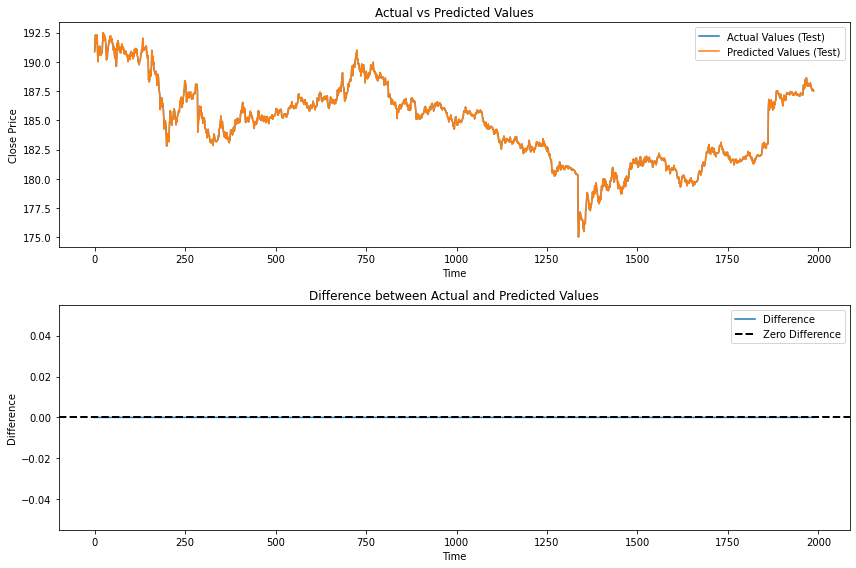

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Создаем случайный DataFrame для тестирования
# Вам следует заменить это загрузкой данных с использованием moexalgo или другого источника данных
data = result[int(-len(result)/10):]

# Преобразование времени в числовой формат
data['begin'] = pd.to_numeric(data['begin'])
data['end'] = pd.to_numeric(data['end'])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end']])

# Создание последовательности данных для обучения
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)) :
        X.append(data[i-sequence_length:i])
        y.append(data[i][3]) 
    return np.array(X), np.array(y)

sequence_length = 60  # Длина последовательности данных для предсказания следующего значения
X, y = create_sequences(scaled_data, sequence_length)

# Разделение на обучающую и тестовую выборки (последний месяц)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Создание модели RNN
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 8)))
model.add(LSTM(50, return_sequences=True, activation='relu', input_shape=(sequence_length, 8)))
model.add(Dropout(0.2))
model.add(LSTM(60))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Предсказание
predicted_values = model.predict(X_test)

# Инвертирование шкалирования для визуализации
predicted_values = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], predicted_values], axis=1))[:, 1]

# Визуализация
actual_values = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], y_test.reshape(-1, 1)], axis=1))[:, 1]

# График фактических и предсказанных значений
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(actual_values, label='Actual Values (Test)')
plt.plot(predicted_values, label='Predicted Values (Test)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Values')
plt.legend()

# График различий между фактическими и предсказанными значениями
plt.subplot(2, 1, 2)
difference = actual_values - predicted_values
plt.plot(difference, label='Difference')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Difference')
plt.legend()

plt.tight_layout()
plt.show()


624/624 [==============================] - 9s 14ms/step


<Figure size 864x576 with 0 Axes>

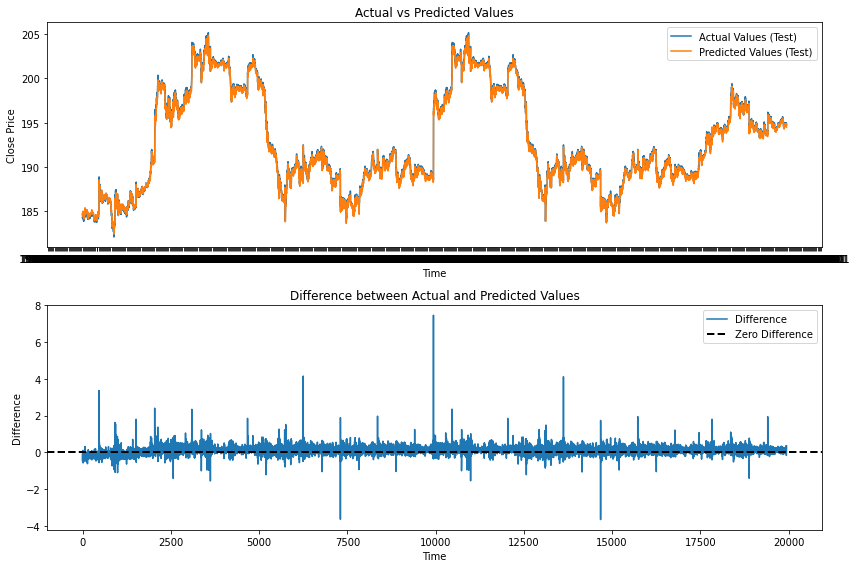

In [93]:
import matplotlib.dates as mdates
data2 = result2

# Преобразование времени в числовой формат
data2['begin'] = pd.to_numeric(data['begin'])
data2['end'] = pd.to_numeric(data['end'])

# Масштабирование данных
#scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(data2[['open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end']].values)

X_new, _ = create_sequences(scaled_data2, sequence_length)
predicted_prices_new = model.predict(X_new)

predicted_prices_new_expanded = np.zeros((predicted_prices_new.shape[0], 8))
predicted_prices_new_expanded[:, 3] = predicted_prices_new[:, 0]
inverse_scaled_predictions_new = scaler.inverse_transform(predicted_prices_new_expanded)
final_predictions_new = inverse_scaled_predictions_new[:, 3]

# Преобразование числового времени обратно в даты
data2['begin'] = pd.to_datetime(data2['begin'], unit='ns')
data2['end'] = pd.to_datetime(data2['end'], unit='ns')

actual_prices_new = result2['close'].values[-len(final_predictions_new):]

# График фактических и предсказанных значений
plt.figure(figsize=(12, 8))

# График фактических и предсказанных значений
plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(actual_prices_new, label='Actual Values (Test)')
plt.plot(final_predictions_new, label='Predicted Values (Test)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Values')
plt.legend()

# Форматирование оси X для уменьшения количества отображаемых точек
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()

# График различий между фактическими и предсказанными значениями
plt.subplot(2, 1, 2)
difference = actual_prices_new - final_predictions_new
plt.plot(difference, label='Difference')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Difference')
plt.legend()
plt.tight_layout()
plt.show()



In [84]:
pd.DataFrame(difference).describe()

,0
count,19940.000000
mean,0.129838
std,0.210745
min,-3.657820
25%,0.032913
50%,0.132809
75%,0.223866
max,7.465838


In [87]:
final_predictions_new

array([184.69890188, 184.79082838, 184.64493339, ..., 194.59289926,
       194.57972348, 194.48566419])

In [58]:
data = result

# Преобразование времени в числовой формат
data['begin'] = pd.to_numeric(data['begin'])
data['end'] = pd.to_numeric(data['end'])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end']].values)

In [70]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.697699,0.697517,0.697649,0.697735,0.010035,0.008804,0.486121,0.486121
std,0.260074,0.259963,0.259678,0.260866,0.017257,0.015992,0.240726,0.240726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.632927,0.632670,0.633079,0.633028,0.002111,0.001639,0.295587,0.295587
50%,0.812195,0.811967,0.811807,0.812602,0.005058,0.004042,0.469112,0.469112
75%,0.862195,0.861946,0.861883,0.862602,0.011673,0.009919,0.683790,0.683790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
